In [ ]:
!pip install optuna

In [27]:
!pip install shap

In [28]:
## import packages
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import shap

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, plot_importance
import lightgbm as lgb

from warnings import filterwarnings
filterwarnings('ignore')

In [22]:
## load the training and validation data
train_features = pd.read_csv("train_features.csv")
train_labels = pd.read_csv("train_labels.csv")
validation_features = pd.read_csv("validation_features.csv")
validation_labels = pd.read_csv("validation_labels.csv")

In [23]:
train_features.drop(columns='weekly_median_cases', inplace=True)
validation_features.drop(columns='weekly_median_cases', inplace=True)

#### Linear Regression

In [25]:
## linear model needs scaling
scaler = StandardScaler()
scaler.fit(train_features)

## fit and transform
scaled_train_features = train_features.copy()
scaled_validation_features = validation_features.copy()
scaled_train_features[scaled_train_features.columns] = scaler.transform(train_features)
scaled_validation_features[scaled_validation_features.columns] = scaler.transform(validation_features)

In [26]:
## Linear regression
lr = LinearRegression()

lr.fit(train_features, train_labels)
Y_pred = lr.predict(validation_features)

## show MAE for validation data
mean_absolute_error(validation_labels, Y_pred)

13.382947698718775

#### Random Forest

In [30]:
## Randomforest
regressor = RandomForestRegressor(random_state=42)

# fit the regressor with training data
regressor.fit(train_features, train_labels)
Y_pred = regressor.predict(validation_features)

## show MAE for validation data
mean_absolute_error(validation_labels, Y_pred)

8.024794520547944

Text(0.5, 1.0, 'Feature Importance')

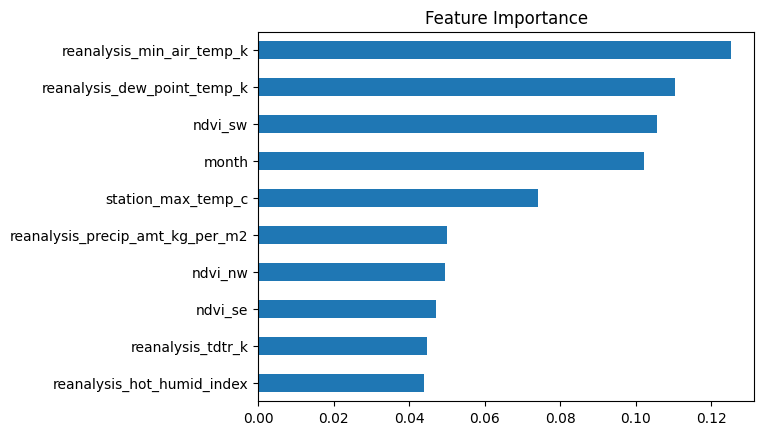

In [31]:
feat_importances = pd.Series(regressor.feature_importances_, index=train_features.columns)
feat_importances.nlargest(10).plot(kind='barh').invert_yaxis()
plt.title('Feature Importance')

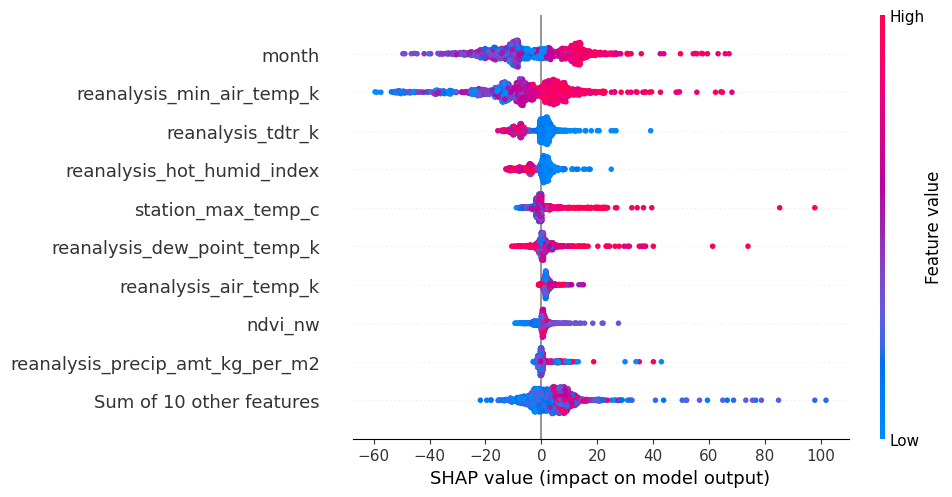

In [32]:
# explain the model's predictions using SHAP
explainer = shap.Explainer(regressor)
shap_values = explainer(train_features)

# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

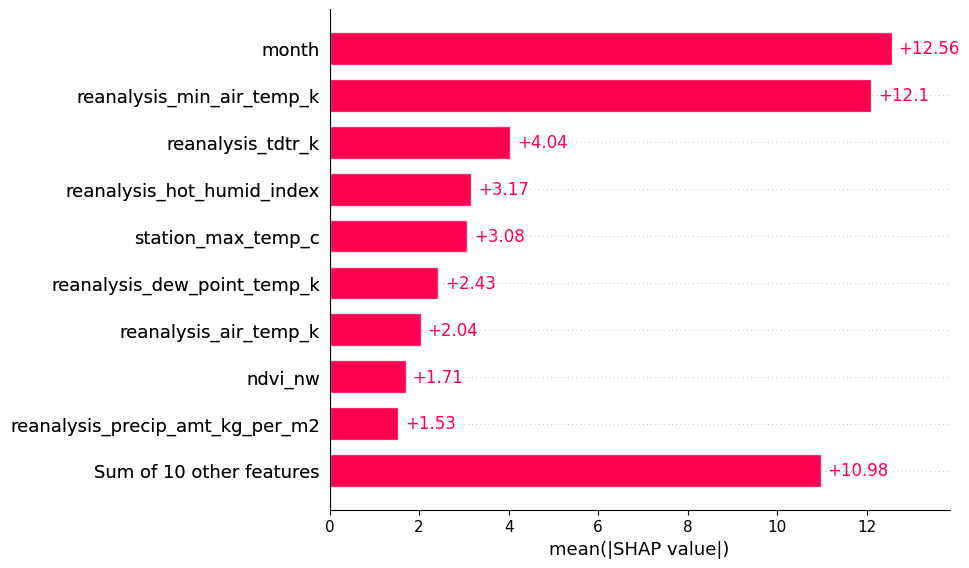

In [33]:
## SHAP importance for Random Forest
shap.plots.bar(shap_values)